#**Clustering Dataset Capstone Project**

Proses pertama dari bagian Machine Learning adalah melakukan clustering yakni teknik unsupervised learning dengan tujuan untuk mengelompokkan fitur-fitur data ke dalam cluster berdasarkan kemiripan antar fitur tanpa menggunakan label atau informasi sebelumnya

# **1. Data Understanding**

## Package/Library yang digunakan

Pada tahapan pertama dari proses clustering akan dilakukan import package/library yang diperlukan untuk kemudahan dalam proses analisis data, eksplorasi, pemodelan machine learning, visualisasi, serta evaluasi hasil

Adapun library yang digunakan pada proses clustering sebagai berikut:

*   `import pandas as pd`
    > Untuk memanipulasi dan menganalisis data

*   `import matplotlib.pyplot as plt`
    > Untuk membuat sebuah area yang nantinya akan digunakan untuk membuat visualisasi data

*   `import seaborn as sns`
    > Untuk membuat visualisasi data yang atraktif dan informatif

*   `from sklearn.preprocessing import RobustScaler`
    > Untuk melakukan skaling fitur dengan cara yang tidak sensitif terhadap outlier. RobustScaler akan mengurangi pengaruh outlier dengan menggunakan median dan interkuartil range (IQR)

*   `from yellowbrick.cluster import KElbowVisualizer`
    > Untuk membantu menentukan jumlah cluster yang optimal menggunakan metode elbow method, dengan visualisasi yang jelas. Library yellowbrick mempermudah analisis dan pemilihan jumlah cluster saat menggunakan algoritma yang kami gunakan yakni KMeans

*   `from sklearn.cluster import KMeans`
    > Merupakan algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam cluster berdasarkan kemiripan fitur. KMeans membagi data ke dalam `k` cluster dengan meminimalkan jarak antar data dan pusat cluster (centroid).

*   `from sklearn.decomposition import PCA`
    > Untuk melakukan reduksi dimensi data secara efisien dengan mempertahankan informasi penting juga untuk menyederhanakan data berdimensi tinggi menjadi dimensi yang lebih rendah untuk visualisasi atau pemrosesan yang lebih cepat.

*   `from sklearn.metrics import silhouette_score`
    > Untuk mengukur kualitas clustering, yakni seberapa baik setiap objek berada dalam cluster yang sesuai. Nilai silhouette score berkisar antara angka -1 hingga 1, jika semakin tinggi nilainya maka semakin baik pemisahan antar cluster.

*   `from statsmodels.stats.outliers_influence import variance_inflation_factor`
    > untuk menghitung VIF (Variance Inflation Factor) yakni metrik yang menunjukkan apakah terdapat multikolinearitas antar fitur dalam data. VIF tinggi menunjukkan bahwa suatu fitur memiliki korelasi tinggi dengan fitur lainnya, yang bisa mempengaruhi kinerja model prediktif.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Loading

Pada tahapan selanjutnya dilakukan proses data loading, yaitu proses memuat dataset ke dalam lingkungan kerja agar data dapat digunakan dengan lebih mudah pada tahap-tahap berikutnya seperti eksplorasi, preprocessing, pemodelan, dan evaluasi.

Adapun dataset yang digunakan pada proyek ini merupakan **dataset sintesis** yang dibuat menggunakan bantuan AI, dengan menyesuaikan pada konteks financial check-up masyarakat Indonesia. Dataset ini dirancang untuk mencerminkan karakteristik keuangan dan kebiasaan umum masyarakat, sehingga tetap relevan dengan kondisi nyata di Indonesia.


In [ ]:
file_id = '1xhvApBd1zMG4OqP7kDyyTR2V8v5Dc6-4'
file_path = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(file_path)
df

,Nama Lengkap,Usia,Pendapatan Bulanan,Jenis Pekerjaan,Jumlah Tanggungan,Kebutuhan Pokok,Tempat Tinggal,Transportasi,Pendidikan,Kesehatan,...,Total Pengeluaran,Cicilan Per Bulan,Total Utang,Tabungan,Investasi,Dana Darurat,Total Aset,Pilihan Perencanaan Keuangan,Target Berapa Tahun Dari Sekarang,Dana Dari Simpanan Mana
0,Lia Wijaya,55,3624413,Pegawai Negeri Sipil,2,960455,489693,302170,325717,386686,...,3139614,735441,36036636,197938,751820,282643,13500000,Belum Punya Tujuan,Jangka Panjang,Aset
1,Dewi Putri,44,6288582,Tenaga Kesehatan,2,2155461,791703,932741,429364,430587,...,5605819,339530,2376712,1175000,1144809,280751,9000000,Lainnya,Jangka Pendek,Tidak Ada
2,Gilang Santoso,24,7056362,Pegawai Negeri Sipil,1,2342758,721036,1036992,264021,273647,...,5504003,926730,19461335,1407490,1495297,708530,3000000,Dana Pendidikan Anak,Jangka Menengah,Aset
3,Irfan Santoso,61,1947890,Wirausaha / Pebisnis / Freelancer,0,721361,173257,289629,0,100000,...,1612226,271957,12510042,453842,594128,163494,3000000,Belum Punya Tujuan,Tidak Ada,Aset
4,Hana Saputra,64,8672353,Pegawai Negeri Sipil,2,2898183,1092293,1276320,551652,401563,...,7130521,870962,32225619,1537452,1251479,789431,10500000,Dana Menikah,Tidak Ada,Investasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Lia Santoso,20,2077432,Tidak bekerja,4,553665,311157,188519,966041,710609,...,3139257,245544,4665345,332591,374280,209564,12000000,Liburan,Tidak Ada,Investasi
19996,Lia Putri,58,1000000,Wirausaha / Pebisnis / Freelancer,1,273953,152075,68151,200681,237132,...,1165530,73489,3674483,236518,319260,69827,3000000,Modal Usaha,Jangka Pendek,Aset
19997,Mira Hidayat,20,4303148,Tidak bekerja,3,1126469,782513,531549,628897,638807,...,4266365,553642,19931135,758784,529825,617477,9000000,Liburan,Tidak Ada,Lainnya
19998,Budi Saputra,21,11048058,Pegawai Bank / Keuangan,1,3407319,1382550,1399472,238415,270567,...,8228578,2592561,72591715,1636066,3385544,768175,3000000,Liburan,Tidak Ada,Aset


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah tahap awal atau pondasi utama dalam proses analisis data yang bertujuan untuk memahami struktur, pola, dan karakteristik data sebelum dilakukan pemodelan atau analisis lebih lanjut.

### Informasi Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Nama Lengkap                       20000 non-null  object
 1   Usia                               20000 non-null  int64 
 2   Pendapatan Bulanan                 20000 non-null  int64 
 3   Jenis Pekerjaan                    20000 non-null  object
 4   Jumlah Tanggungan                  20000 non-null  int64 
 5   Kebutuhan Pokok                    20000 non-null  int64 
 6   Tempat Tinggal                     20000 non-null  int64 
 7   Transportasi                       20000 non-null  int64 
 8   Pendidikan                         20000 non-null  int64 
 9   Kesehatan                          20000 non-null  int64 
 10  Komunikasi & Internet              20000 non-null  int64 
 11  Gaya Hidup & Hiburan               20000 non-null  int64 
 12  Sede

**Insight**

Diperoleh bahwa dataset `df` merupakan dataset yang berisikan 20000 baris dengan 25 fitur

### Memeriksa Dataset yang Duplikat

In [ ]:
df.isna().sum()

,0
Nama Lengkap,0
Usia,0
Pendapatan Bulanan,0
Jenis Pekerjaan,0
Jumlah Tanggungan,0
Kebutuhan Pokok,0
Tempat Tinggal,0
Transportasi,0
Pendidikan,0
Kesehatan,0


**Insight**

Diperoleh dari dataset `df` tidak terdapat data yang missing value

### Memeriksa Dataset yang Missing Value

In [ ]:
df.columns.to_list()

['Nama Lengkap',
 'Usia',
 'Pendapatan Bulanan',
 'Jenis Pekerjaan',
 'Jumlah Tanggungan',
 'Kebutuhan Pokok',
 'Tempat Tinggal',
 'Transportasi',
 'Pendidikan',
 'Kesehatan',
 'Komunikasi & Internet',
 'Gaya Hidup & Hiburan',
 'Sedekah & Donasi',
 'Pengeluaran Tidak Terduga',
 'Lainnya',
 'Total Pengeluaran',
 'Cicilan Per Bulan',
 'Total Utang',
 'Tabungan',
 'Investasi',
 'Dana Darurat',
 'Total Aset',
 'Pilihan Perencanaan Keuangan',
 'Target Berapa Tahun Dari Sekarang',
 'Dana Dari Simpanan Mana']

In [ ]:
df.duplicated().sum()

np.int64(0)

**Insight**

Diperoleh bahwa dataset `df` tidak terdapat data yang duplikat.

### Mengelompokkan Kolom dalam DataFrame Menjadi 2 jenis



In [ ]:
numeric_feature = df.select_dtypes('number').columns.to_list()
print(f"numeric = {numeric_feature}")
category_feature = df.select_dtypes('object').columns.to_list()
print(f"categorical = {category_feature}")

numeric = ['Usia', 'Pendapatan Bulanan', 'Jumlah Tanggungan', 'Kebutuhan Pokok', 'Tempat Tinggal', 'Transportasi', 'Pendidikan', 'Kesehatan', 'Komunikasi & Internet', 'Gaya Hidup & Hiburan', 'Sedekah & Donasi', 'Pengeluaran Tidak Terduga', 'Lainnya', 'Total Pengeluaran', 'Cicilan Per Bulan', 'Total Utang', 'Tabungan', 'Investasi', 'Dana Darurat', 'Total Aset']
categorical = ['Nama Lengkap', 'Jenis Pekerjaan', 'Pilihan Perencanaan Keuangan', 'Target Berapa Tahun Dari Sekarang', 'Dana Dari Simpanan Mana']


**Insight**

Didapatkan 2 jenis kolom DataFrame yakni numerik dan kategori


### Menguraikan Seluruh Fitur Pada Dataset



**Fitur-Fitur pada Dataset**

Dataset ini berisi karakteristik keuangan dan kebiasaan umum masyarakat di Indonesia, yang digunakan untuk proses analisis dan pemodelan machine learning. Berikut adalah daftar fitur yang tersedia:

- **Nama Lengkap** : *string*
- **Usia** : *integer*
- **Pendapatan Bulanan** : *integer*
- **Jenis Pekerjaan** : *kategori*, dengan pilihan berikut:
  - (1) Pegawai Negeri Sipil  
  - (1) Pegawai Swasta  
  - (1) Guru / Dosen  
  - (1) Tenaga Kesehatan  
  - (1) Pegawai Bank / Keuangan  
  - (1) Karyawan Startup / IT  
  - (2) Wirausaha / Pebisnis / Freelancer  
  - (2) Petani / Nelayan  
  - (2) Buruh / Pekerja Lepas  
  - (2) Sopir  
  - (2) Tukang / Teknisi  
  - (3) Ibu Rumah Tangga  
  - (3) Tidak Bekerja  
  - (3) Pensiunan  
  - (4) Mahasiswa  
  - (4) Pelajar  
  - (5) Lainnya  
- **Jumlah Tanggungan** : *integer* (contoh: 1, 2, 3, ...)
______________________________________________________________

**Pengeluaran (dalam satuan rupiah)**
- **Kebutuhan Pokok** : *integer*  
- **Tempat Tinggal** : *integer*  
- **Transportasi** : *integer*  
- **Pendidikan** : *integer*  
- **Kesehatan** : *integer*  
- **Komunikasi & Internet** : *integer*  
- **Gaya Hidup & Hiburan** : *integer*  
- **Sedekah & Donasi** : *integer*  
- **Pengeluaran Tidak Terduga** : *integer*  
- **Lainnya** : *integer*  
- **Total Pengeluaran** : *integer* (merupakan hasil penjumlahan seluruh komponen pengeluaran di atas)
______________________________________________________________

**Utang & Cicilan**
- **Cicilan Per Bulan** : *integer*  
- **Total Utang** : *integer*

______________________________________________________________

**Simpanan & Aset**
- **Tabungan** : *integer* (total nominal)  
- **Investasi** : *integer* (total nominal)  
- **Dana Darurat** : *integer*  
- **Total Aset** : *integer* (berisi estimasi nilai barang berharga seperti HP, laptop, kendaraan, dll)
______________________________________________________________

**Perencanaan Keuangan**
- **Tujuan Keuangan** *(multi-pilihan / kategori)*:
  - Dana Darurat  
  - Dana Pendidikan Anak  
  - Dana Menikah  
  - Pembelian Rumah  
  - Kendaraan Pribadi  
  - Modal Usaha  
  - Ibadah Haji atau Umroh  
  - Liburan  
  - Dana Pensiun  
  - Warisan atau Wasiat  
  - Lainnya  
  - Belum Punya Tujuan
______________________________________________________________

- **Target Tahun dari Sekarang** *(kategori)*:
  - Jangka Pendek (< 3 tahun)  
  - Jangka Menengah (4–5 tahun)  
  - Jangka Panjang (> 5 tahun)  
  - Tidak Ada  
______________________________________________________________

- **Sumber Dana untuk Mewujudkan Tujuan** *(bisa multi-label / binary)*:
  - Tabungan  
  - Aset  
  - Investasi  
  - Lainnya  
  - Tidak Ada


In [ ]:
df.describe()

,Usia,Pendapatan Bulanan,Jumlah Tanggungan,Kebutuhan Pokok,Tempat Tinggal,Transportasi,Pendidikan,Kesehatan,Komunikasi & Internet,Gaya Hidup & Hiburan,Sedekah & Donasi,Pengeluaran Tidak Terduga,Lainnya,Total Pengeluaran,Cicilan Per Bulan,Total Utang,Tabungan,Investasi,Dana Darurat,Total Aset
count,20000.000000,2.000000e+04,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.00000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,40.409450,5.052700e+06,1.508250,1.642102e+06,7.079701e+05,5.057083e+05,3.313913e+05,2.920706e+05,137317.939450,2.772596e+05,151265.980650,126211.65535,101005.884950,4.272728e+06,8.793315e+05,2.862355e+07,7.591032e+05,1.011313e+06,4.549761e+05,8.210625e+06
std,13.797026,2.390713e+06,1.235641,8.137450e+05,3.888587e+05,2.884745e+05,2.857369e+05,1.681833e+05,36144.432807,1.537414e+05,96412.032048,77194.89632,57289.814943,1.765440e+06,5.773735e+05,2.497149e+07,4.809686e+05,6.767250e+05,2.915009e+05,3.437938e+06
min,17.000000,1.000000e+06,0.000000,2.503100e+05,8.018200e+04,5.000200e+04,0.000000e+00,1.000000e+05,75001.000000,3.003400e+04,10113.000000,10007.00000,10020.000000,7.092100e+05,5.024000e+04,3.739490e+05,5.017100e+04,5.025400e+04,3.002600e+04,3.000000e+06
25%,28.000000,3.316782e+06,1.000000,1.049690e+06,4.195158e+05,2.902315e+05,1.530488e+05,1.827680e+05,106042.750000,1.628510e+05,77435.250000,67653.00000,58507.250000,2.980724e+06,4.253230e+05,1.022672e+07,3.828660e+05,4.714672e+05,2.298822e+05,4.500000e+06
50%,40.000000,4.980778e+06,1.000000,1.595548e+06,6.572915e+05,4.618230e+05,2.737720e+05,2.588995e+05,137356.000000,2.566675e+05,131479.000000,111469.50000,92544.500000,4.193620e+06,7.614935e+05,2.099798e+07,6.650480e+05,8.691010e+05,3.944740e+05,7.500000e+06
75%,52.000000,6.654791e+06,2.000000,2.164905e+06,9.427322e+05,6.761865e+05,4.986055e+05,3.902572e+05,168588.000000,3.708448e+05,206863.250000,170765.50000,135274.250000,5.435099e+06,1.212107e+06,3.978378e+07,1.041789e+06,1.408844e+06,6.266210e+05,1.050000e+07
max,64.000000,1.490534e+07,6.000000,5.794840e+06,2.490193e+06,1.868382e+06,1.793334e+06,1.178096e+06,199996.000000,1.070148e+06,675285.000000,550474.00000,369303.000000,1.263030e+07,3.920115e+06,2.000222e+08,3.162251e+06,4.841484e+06,2.163608e+06,1.350000e+07


**Insight**


1. Dataset ini terdiri dari 20000 data
2. Dataset ini terdiri dari 26 fitur
3. Tidak terdapat data yang kosong
4. Tidak terdapat data yang duplikat
5. Rangkuman Statistik Deskriptif


- Usia Responden: Rata-rata usia adalah 40 tahun, dengan rentang antara 17 hingga 64 tahun — ini menunjukkan bahwa dataset mencakup populasi usia produktif dan pra-pensiun.

- Pendapatan Bulanan: Rata-rata pendapatan adalah Rp5 juta/bulan,maksimum mencapai Rp14,9 juta, menunjukkan adanya distribusi pendapatan yang luas

- Tanggungan dan Beban Hidup: Rata-rata adalah 1-2 orang, dengan maksimal 6 orang, menunjukkan sebagian individu menanggung lebih dari satu anggota keluarga

- Pola Pengeluaran: Rata-rata total pengeluaran adalah sekitar Rp4,2 juta/bulan, yang hampir mendekati rata-rata pendapatan bulanan. Menunjukakkn kemungkinan banyak individu berpotensi tidak menabung.

- Terdapat komponen pengeluaran terbesar:

 1. Kebutuhan Pokok (mean: Rp1,64 juta)

 2. Tempat Tinggal (mean: Rp700 ribu)

 3. Gaya Hidup & Hiburan (mean: Rp277 ribu)

 Meskipun ada kategori “Sedekah & Donasi” dan “Tidak Terduga”, nilai pengeluarannya jauh lebih kecil, menunjukkan kebanyakan pengeluaran masyarakat masih pada kebutuhan utama.


- Utang dan Kewajiban: Rata-rata cicilan bulanan yakni Rp879 ribu, dengan maksimum mencapai Rp3,9 juta.

- Total utang rata-rata sangat tinggi, yaitu Rp28 juta, dengan maksimum bahkan menyentuh Rp200 juta+.
Hal ini menunjukkan terdapat masyarakat yang sedang berutang besar (misal: KPR atau utang usaha), juga terdapat potensi risiko finansial bagi individu berpendapatan rendah tapi memiliki cicilan besar.


- Simpanan dan Aset
 1. Tabungan rata-rata hanya Rp759 ribu, sementara:

 2. Investasi rata-rata: Rp1 juta,

 3. Dana Darurat: Rp454 ribu, dengan maksimum hingga Rp2.16 juta

 4. Total Aset rata-rata: Rp8,2 juta, dengan maksimum hingga Rp13,5 juta.

 Menunjukkan sebagian besar masyarakat memiliki aset yang cukup rendah dibandingkan total utang.

- Ada ketimpangan ekonomi dalam populasi ini, terlihat dari selisih antara min vs max pada hampir semua fitur.



## Visualisasi Data


Pada proses selanjutnya yakni visualisasi data untuk membantu dalam mengenali data yang sedang digunakan dan membuat strategi analisis yang paling efisien


### Histogram Untuk Menampilkan Distribusi Data Normal Atau Tidak

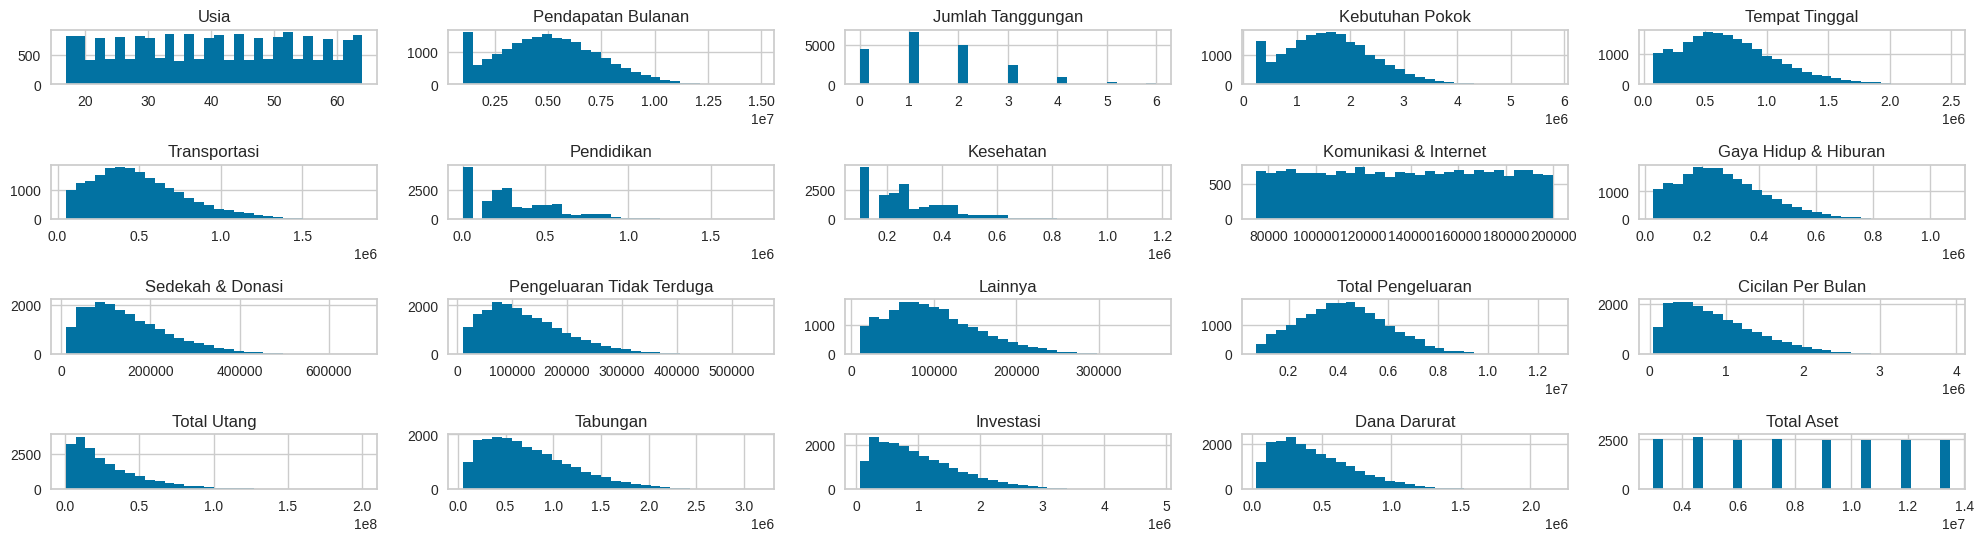

In [ ]:
df.hist(figsize=(20, 20), bins=30, layout=(15, 5))
plt.tight_layout()
plt.show()

**Insight**

1. Usia: distribusi normal

2. Pendapatan Bulanan: distribusi Right-skewed

3. Jumlah Tanggungan: distribusi: Multimodal (nilai 0, 1, dan 2 dominan)

4. Kebutuhan Pokok: distribusi Right-skewed

5. Tempat Tinggal: distribusi Right-skewed

6. Transportasi: distribusi Right-skewed

7. Pendidikan: distribusi Right-skewed (dengan outlier)

8. Kesehatan: distribusi Right-skewed (dengan outlier)

9. Komunikasi Internet: distribusi hampir normal

10. Gaya Hidup Hiburan: distribusi Right-skewed

11. Sedekah Donasi: distribusi Right-skewed

12. Pengeluaran Tidak Terduga: distribusi Right-skewed

13. Lainnya: distribusi Right-skewed

14. Total Pengeluaran: distribusi Right-skewed

15. Cicilan per Bulan: distribusi Right-skewed

16. Total Utang: distribusi Sangat right-skewed (dengan outlier)

17. Tabungan: distribusi Right-skewed

18. Investasi: distribusi Right-skewed

19. Dana Darurat: distribusi Right-skewed

20. Total_aset: distribusi Multimodal (distribusi terpisah & rata di beberapa titik)



### Heatmap Untuk Menampilkan Korelasi Antar Fitur

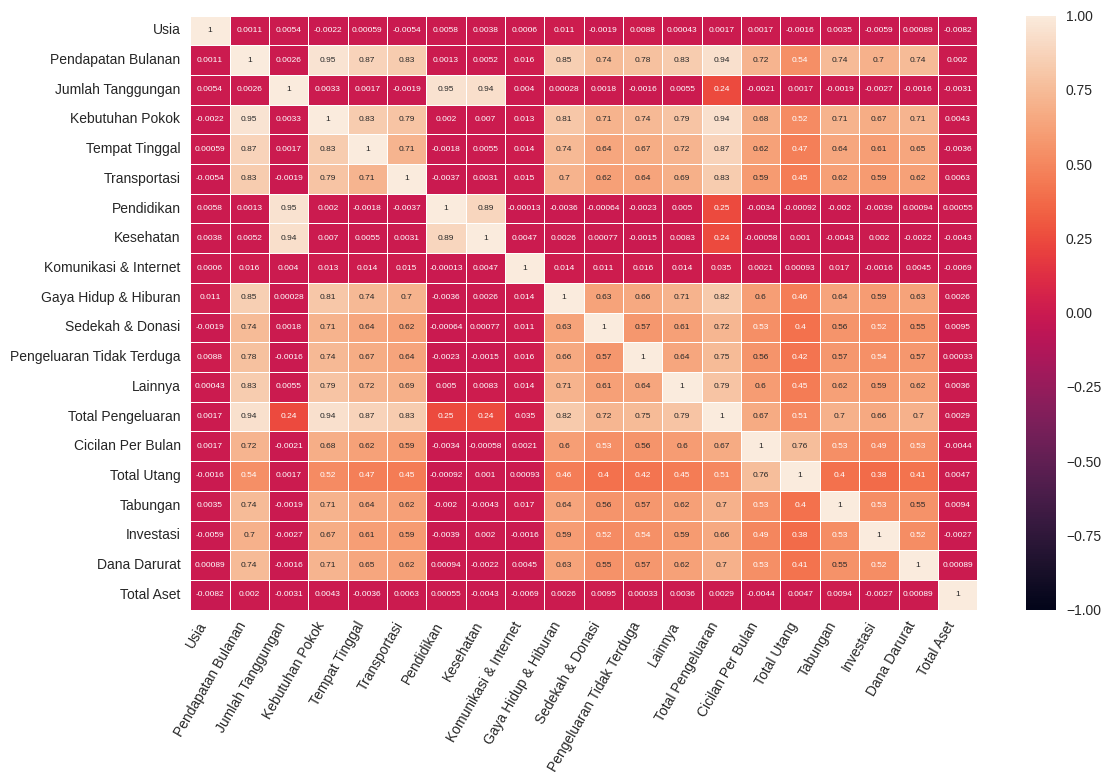

In [ ]:
corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 6}
)

plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=0)


plt.tight_layout()
plt.show()

**Insight**

1. Hubungan antar fitur pengeluaran cukup tinggi.
Fitur `Kebutuhan Pokok, Tempat Tinggal, Transportasi, Gaya Hidup & Hiburan` memiliki korelasi yang cukup tinggi dengan `Total Pengeluaran` (>0.7). Hal ini menunjukkan bahwa fitur-fitur pengeluaran saling berkaitan.

2. Pendapatan berkorelasi dengan kebanyakan fitur keuangan (>0.7-0.9). Hal ini menunjukkan bahwa semakin tinggi pendapatan maka semakin besar juga pengeluaran dan simpanan.


3. Jumlah Tanggungan memiliki nilai korelasi dengan sebagian fitur pengeluaran. Hal ini menunjukkan bahwa semakin banyak tanggungan, maka pengeluaran semakin meningkat.

4. Total Aset tidak memiliki nilai korelasi yang tinggi dengan fitur lainnya.

5. Usia tidak berkorelasi dengan fitur keuangan. Hal ini kenunjukkan bahwa usia bukan prediktor yang relevan dalam fitur lainnya.

### Barplot Untuk Menampikan Rata-rata Pendapatan Bulanan per Jenis Pekerjaan

<ipython-input-49-41036930521d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_sales.index, y=job_sales.values, palette='Set3')


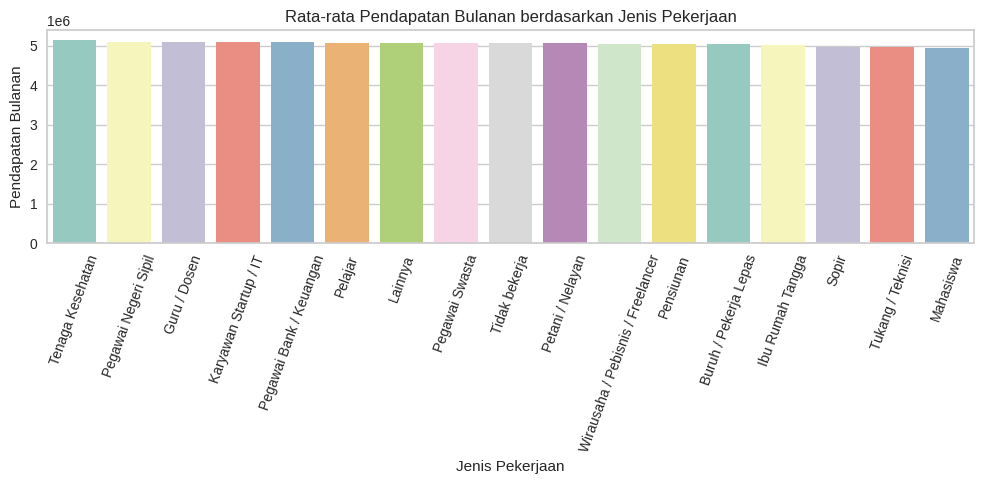

In [ ]:
job_sales = df.groupby('Jenis Pekerjaan')['Pendapatan Bulanan'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=job_sales.index, y=job_sales.values, palette='Set3')
plt.title('Rata-rata Pendapatan Bulanan berdasarkan Jenis Pekerjaan')
plt.ylabel('Pendapatan Bulanan')
plt.xlabel('Jenis Pekerjaan')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

**Insight**

Diperoleh bahwa rata-rata pendapatan bulanan berdasarkan jenis pekerjaan menunjukkan pola yang relatif seragam, tidak ada perbedaan mencolok antar kategori pekerjaan. Hal ini menunjukkan bahwa jenis pekerjaan tidak menjadi faktor penentu utama perbedaan pendapatan bulanan

# **2. Data Preparation**

Tahapan selanjutnya adalah data preparation, yakni proses menyiapkan dataset agar siap digunakan untuk analisis dan pemodelan.


Berdasarkan hasil EDA diketahui bahwa dataset yang digunakan tidak terdapat missing value, duplikat data sehingga tidak perlu ditangani, namun terdapat data yang outlier sehingga yang ditangani hanya dari sisi outlier, karena clustering dengan metode K-Means sangat sensitif dengan outlier sehingga perlu ditangani lebih lanjut. Kemudian dilakukan Feature Engineering,  Encoding fitur terhadap fitur kategori dan scaling data untuk memastikan bahwa semua fitur berada pada skala yang sesuai sebelum proses clustering dilakukan.

## Penanganan Outlier

Pada tahapan ini akan dilakukan penanganan outlier dengan menggunakan metode IQR. Proses penangan outlier hanya akan diterapkan pada fitur numerik yang tersimpan dalam variabel `num_feature`

In [ ]:
num_features = df.select_dtypes(include='int64')
num_features

,Usia,Pendapatan Bulanan,Jumlah Tanggungan,Kebutuhan Pokok,Tempat Tinggal,Transportasi,Pendidikan,Kesehatan,Komunikasi & Internet,Gaya Hidup & Hiburan,Sedekah & Donasi,Pengeluaran Tidak Terduga,Lainnya,Total Pengeluaran,Cicilan Per Bulan,Total Utang,Tabungan,Investasi,Dana Darurat,Total Aset
0,55,3624413,2,960455,489693,302170,325717,386686,82051,239573,172312,36328,108167,3139614,735441,36036636,197938,751820,282643,13500000
1,44,6288582,2,2155461,791703,932741,429364,430587,160038,330307,66222,240639,133731,5605819,339530,2376712,1175000,1144809,280751,9000000
2,24,7056362,1,2342758,721036,1036992,264021,273647,186853,422640,330766,89296,98222,5504003,926730,19461335,1407490,1495297,708530,3000000
3,61,1947890,0,721361,173257,289629,0,100000,75690,137858,74554,62079,49525,1612226,271957,12510042,453842,594128,163494,3000000
4,64,8672353,2,2898183,1092293,1276320,551652,401563,104498,371206,100749,271617,105957,7130521,870962,32225619,1537452,1251479,789431,10500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20,2077432,4,553665,311157,188519,966041,710609,110211,65580,56547,42039,35474,3139257,245544,4665345,332591,374280,209564,12000000
19996,58,1000000,1,273953,152075,68151,200681,237132,136129,69920,10523,11787,27120,1165530,73489,3674483,236518,319260,69827,3000000
19997,20,4303148,3,1126469,782513,531549,628897,638807,79041,130029,152912,99508,74482,4266365,553642,19931135,758784,529825,617477,9000000
19998,21,11048058,1,3407319,1382550,1399472,238415,270567,76125,340815,482663,184311,250723,8228578,2592561,72591715,1636066,3385544,768175,3000000


### Memeriksa Jumlah Outlier dari Setiap Fitur Numerik

In [ ]:
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < low_bound) | (df[feature] > up_bound)]
    num_outliers = outliers.shape[0]

    print(f'{feature} : {num_outliers}')

Usia : 0
Pendapatan Bulanan : 81
Jumlah Tanggungan : 1373
Kebutuhan Pokok : 159
Tempat Tinggal : 280
Transportasi : 310
Pendidikan : 529
Kesehatan : 502
Komunikasi & Internet : 0
Gaya Hidup & Hiburan : 266
Sedekah & Donasi : 358
Pengeluaran Tidak Terduga : 359
Lainnya : 297
Total Pengeluaran : 111
Cicilan Per Bulan : 336
Total Utang : 805
Tabungan : 323
Investasi : 306
Dana Darurat : 330
Total Aset : 0


### Metode IQR

Metode IQR digunakan untuk menangani outlier karena lebih tahan terhadap nilai-nilai ekstrem dan tidak mengharuskan data memiliki distribusi normal.

In [ ]:
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= low_bound) & (df[feature] <= up_bound)]

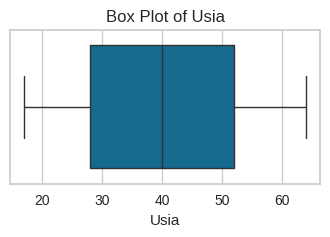

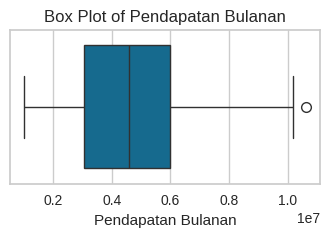

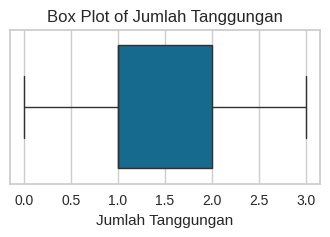

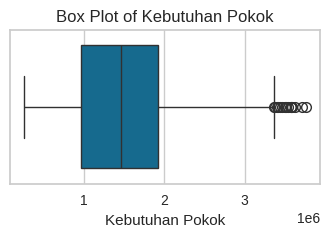

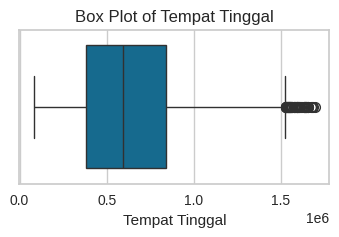

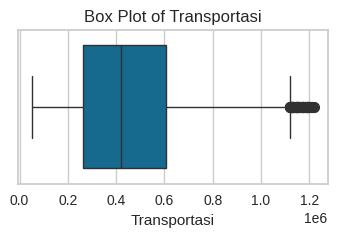

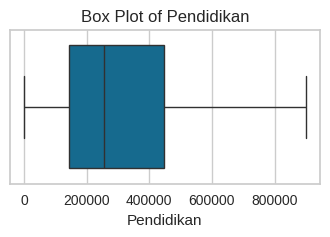

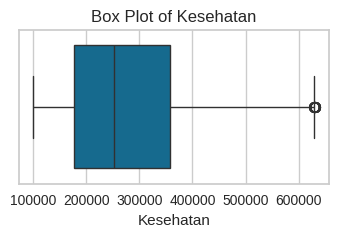

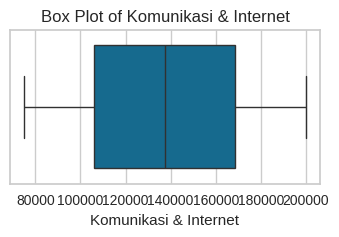

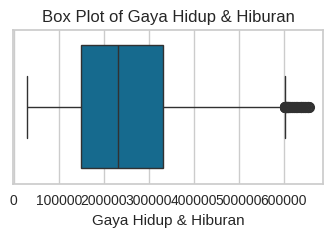

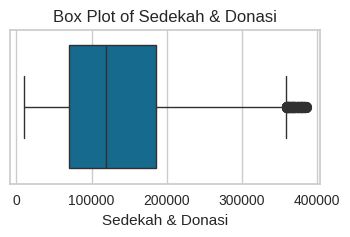

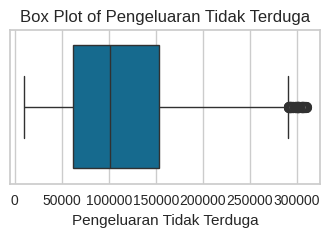

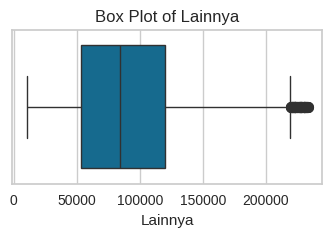

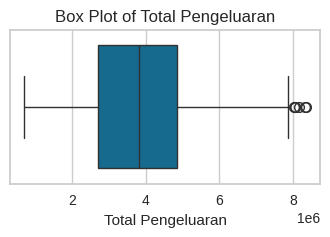

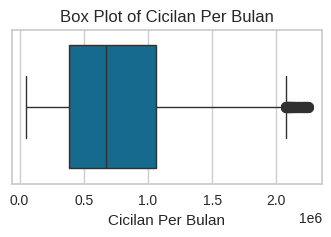

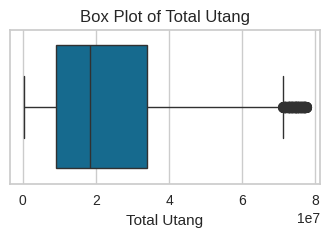

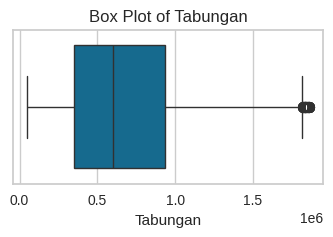

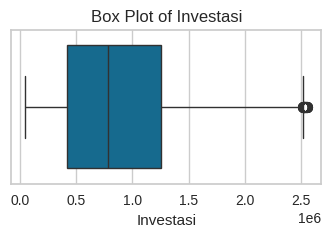

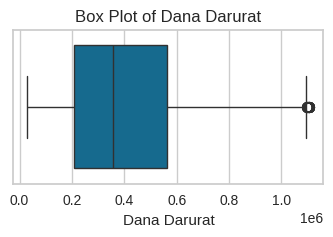

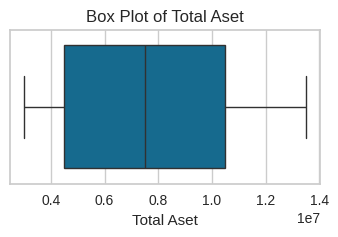

In [ ]:
for feature in num_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

## Feature Engineering


Pada tahap ini, dibuat fitur-fitur baru dengan berbasis rumus rasio keuangan untuk penilaian kesehatan finansial. Fitur-fitur ini dibuat untuk memberi gambaran logis terhadap kondisi keuangan
Berikut beberapa fitur yang ditambahkan:

1. **ExpanseLessThanIncome** = Pengeluaran < Pendapatan
2. **Saving20Percent** = tabungan >= (pendapatan * 0.2)
3. **DebtUnder30PercentIncome** = cicilan <  (pendapatan * 0.3)
4. **EmergencyFundSufficient** =  dana darurat > (pengeluaran * 3)
5. **AssetMoreThanDebt** = total asset > total utang
6. **DebtRatioUnder50Percent** = AssetMoreThanDebt < 0.5


In [ ]:
epsilon = 1e-6

# 1. Rasio Pengeluaran terhadap Pendapatan
df['ExpenseToIncomeRatio'] = df['Total Pengeluaran'] / (df['Pendapatan Bulanan'] + epsilon)

# 2. Rasio Tabungan terhadap Pendapatan
df['SavingToIncomeRatio'] = df['Tabungan'] / (df['Pendapatan Bulanan'] + epsilon)

# 3. Rasio Cicilan terhadap Pendapatan (Debt to Income)
df['DebtToIncomeRatio'] = df['Cicilan Per Bulan'] / (df['Pendapatan Bulanan'] + epsilon)

# 4. Rasio Dana Darurat terhadap Pengeluaran
df['EmergencyFundRatio'] = df['Dana Darurat'] / (df['Total Pengeluaran'] + epsilon)

# 5. Rasio Aset terhadap Utang (Asset to Debt Ratio)
df['AssetToDebtRatio'] = df['Total Aset'] / (df['Total Utang'] + epsilon)

# 6. Rasio Utang terhadap Aset (Debt to Asset Ratio)
df['DebtToAssetRatio'] = df['Total Utang'] / (df['Total Aset'] + epsilon)

df

,Nama Lengkap,Usia,Pendapatan Bulanan,Jenis Pekerjaan,Jumlah Tanggungan,Kebutuhan Pokok,Tempat Tinggal,Transportasi,Pendidikan,Kesehatan,...,Total Aset,Pilihan Perencanaan Keuangan,Target Berapa Tahun Dari Sekarang,Dana Dari Simpanan Mana,ExpenseToIncomeRatio,SavingToIncomeRatio,DebtToIncomeRatio,EmergencyFundRatio,AssetToDebtRatio,DebtToAssetRatio
0,Lia Wijaya,55,3624413,Pegawai Negeri Sipil,2,960455,489693,302170,325717,386686,...,13500000,Belum Punya Tujuan,Jangka Panjang,Aset,0.866241,0.054612,0.202913,0.090025,0.374619,2.669380
1,Dewi Putri,44,6288582,Tenaga Kesehatan,2,2155461,791703,932741,429364,430587,...,9000000,Lainnya,Jangka Pendek,Tidak Ada,0.891428,0.186847,0.053992,0.050082,3.786744,0.264079
2,Gilang Santoso,24,7056362,Pegawai Negeri Sipil,1,2342758,721036,1036992,264021,273647,...,3000000,Dana Pendidikan Anak,Jangka Menengah,Aset,0.780006,0.199464,0.131333,0.128730,0.154152,6.487112
3,Irfan Santoso,61,1947890,Wirausaha / Pebisnis / Freelancer,0,721361,173257,289629,0,100000,...,3000000,Belum Punya Tujuan,Tidak Ada,Aset,0.827678,0.232992,0.139616,0.101409,0.239807,4.170014
5,Eko Putri,53,2190254,Wirausaha / Pebisnis / Freelancer,1,795790,235355,126373,186360,191928,...,10500000,Modal Usaha,Jangka Pendek,Tabungan,0.926483,0.114869,0.273140,0.078529,1.096958,0.911612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,Irfan Hidayat,44,2226963,Tenaga Kesehatan,3,790028,393841,274504,553913,409375,...,3000000,Kendaraan Pribadi,Jangka Pendek,Aset,1.268936,0.220785,0.216174,0.082163,0.132589,7.542115
19992,Joko Putri,56,4864373,Mahasiswa,1,1325986,640206,489731,185213,227424,...,9000000,Modal Usaha,Tidak Ada,Investasi,0.800815,0.177640,0.103358,0.119170,0.380867,2.625590
19993,Hana Wijaya,18,3676200,Guru / Dosen,1,1036846,453949,337723,263174,252025,...,6000000,Warisan atau Wasiat,Jangka Panjang,Tidak Ada,0.789173,0.146967,0.264283,0.084317,0.116522,8.582098
19996,Lia Putri,58,1000000,Wirausaha / Pebisnis / Freelancer,1,273953,152075,68151,200681,237132,...,3000000,Modal Usaha,Jangka Pendek,Aset,1.165530,0.236518,0.073489,0.059910,0.816441,1.224828


In [ ]:
df.columns.to_list()

['Nama Lengkap',
 'Usia',
 'Pendapatan Bulanan',
 'Jenis Pekerjaan',
 'Jumlah Tanggungan',
 'Kebutuhan Pokok',
 'Tempat Tinggal',
 'Transportasi',
 'Pendidikan',
 'Kesehatan',
 'Komunikasi & Internet',
 'Gaya Hidup & Hiburan',
 'Sedekah & Donasi',
 'Pengeluaran Tidak Terduga',
 'Lainnya',
 'Total Pengeluaran',
 'Cicilan Per Bulan',
 'Total Utang',
 'Tabungan',
 'Investasi',
 'Dana Darurat',
 'Total Aset',
 'Pilihan Perencanaan Keuangan',
 'Target Berapa Tahun Dari Sekarang',
 'Dana Dari Simpanan Mana',
 'ExpenseToIncomeRatio',
 'SavingToIncomeRatio',
 'DebtToIncomeRatio',
 'EmergencyFundRatio',
 'AssetToDebtRatio',
 'DebtToAssetRatio']

**Insight**

Fitur-fitur baru yang telah dihasilkan berhasil digabungkan ke dalam dataset awal `df`

## Subsetting Dataset

Pada tahapan ini, akan dibentuk dua subset dataset yang memiliki fitur berbeda, disesuaikan dengan kebutuhan proses sistem financial check-up dan model machine learning yang akan digunakan. Pemisahan ini dilakukan agar proses analisis dan pemodelan menjadi lebih fokus, efisien, dan sesuai tujuan masing-masing.


### Dataset untuk Input Pengguna

Subset dataset ini berisikan fitur-fitur yang akan digunakan sebagai input utama dari pengguna saat menggunakan website, dengan tujuannya untuk menyederhanakan data yang diminta dari pengguna tanpa mengurangi kualitas analisis.


Dataset awal `df` akan disalin selanjutnya akan dipilih fitur-fitur yang diinginkan dan disimpan ke dalam variabel bernama `df_selected_input_user`

Sehingga `df_selected_input_user` hanya akan berisikan fitur-fitur sebagai berikut:

 - Pendapatan Bulanan
 - Total Pengeluaran
 - Tabungan
 - Cicilan Per Bulan
 - Dana Darurat
 - Total Aset
 - Total Utang


Dilakukan penyalinan dari dataset awal agar mencegah terjadinya pencampuran dalam dataset, disimpan dalam variabel baru yakni `df_selected_input_user`

In [ ]:
df_selected_input_user = df.copy()

df_selected_input_user = df_selected_input_user[['Pendapatan Bulanan','Total Pengeluaran','Tabungan', 'Cicilan Per Bulan', 'Dana Darurat', 'Total Aset','Total Utang']]
df_selected_input_user.head()

,Pendapatan Bulanan,Total Pengeluaran,Tabungan,Cicilan Per Bulan,Dana Darurat,Total Aset,Total Utang
0,3624413,3139614,197938,735441,282643,13500000,36036636
1,6288582,5605819,1175000,339530,280751,9000000,2376712
2,7056362,5504003,1407490,926730,708530,3000000,19461335
3,1947890,1612226,453842,271957,163494,3000000,12510042
5,2190254,2029233,251592,598245,159353,10500000,9571926


**Insight**

Dapat dilihat hasil dari pemilihan fitur-fitur telah berada dalam subsetting dataset dari `df_selected_input_user`.

### Dataset untuk Proses Modeling



Subset dataset ini berisi fitur-fitur yang telah dibuat (hasil dari feature engineering) untuk mendukung proses segmentasi pengguna menggunakan metode clustering.

Dataset awal `df` akan disalin selanjutnya akan dipilih fitur-fitur yang diinginkan dan disimpan ke dalam variabel bernama `df_selected_clustering`

Sehingga `df_selected_clustering` hanya akan berisikan fitur-fitur sebagai berikut:

 `df_selected_clustering` yang berisikan fitur-fitur:
 - ExpenseToIncomeRatio
 - SavingToIncomeRatio
 - DebtToIncomeRatio
 - EmergencyFundRatio
 - AssetToDebtRatio
 - DebtToAssetRatio


In [ ]:
df_selected_clustering = df.copy()
features_selected= [
    'ExpenseToIncomeRatio','SavingToIncomeRatio','DebtToIncomeRatio'
    ,'EmergencyFundRatio','AssetToDebtRatio'
    ,'DebtToAssetRatio'
]
df_selected_clustering = df_selected_clustering[features_selected]
df_selected_clustering.head()

,ExpenseToIncomeRatio,SavingToIncomeRatio,DebtToIncomeRatio,EmergencyFundRatio,AssetToDebtRatio,DebtToAssetRatio
0,0.866241,0.054612,0.202913,0.090025,0.374619,2.669380
1,0.891428,0.186847,0.053992,0.050082,3.786744,0.264079
2,0.780006,0.199464,0.131333,0.128730,0.154152,6.487112
3,0.827678,0.232992,0.139616,0.101409,0.239807,4.170014
5,0.926483,0.114869,0.273140,0.078529,1.096958,0.911612


**Insight**

Dapat dilihat hasil dari pemilihan fitur-fitur telah berada dalam subsetting dataset dari `df_selected_clustering`.

## Standarisasi

Pada tahapan selanutnya yakni dilakukan standarisasi pada dataset `df_selected_clustering` dengan menggunakan RobustScaler dikarenakan dataset terlihat skewed

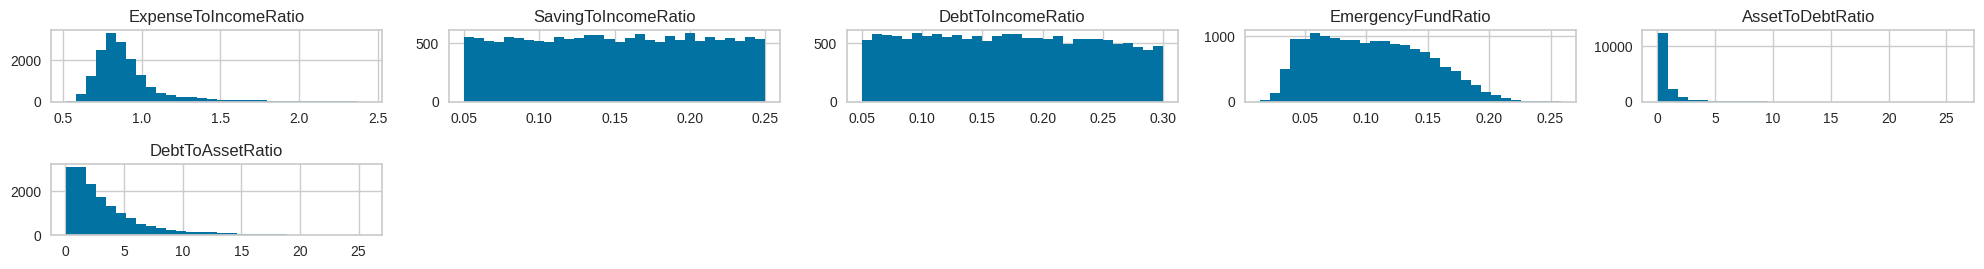

In [ ]:
df_selected_clustering.hist(figsize=(20, 20), bins=30, layout=(15, 5))
plt.tight_layout()
plt.show()

In [ ]:
RScaler = RobustScaler()
scaled_array = RScaler.fit_transform(df_selected_clustering)

scaled_df_clustering = pd.DataFrame(scaled_array, columns=df_selected_clustering.columns, index=df_selected_clustering.index)
scaled_df_clustering.head()

,ExpenseToIncomeRatio,SavingToIncomeRatio,DebtToIncomeRatio,EmergencyFundRatio,AssetToDebtRatio,DebtToAssetRatio
0,0.064204,-0.960544,0.264353,-0.141765,-0.057404,0.069273
1,0.198731,0.369901,-0.954895,-0.698008,5.047050,-0.602529
2,-0.396380,0.496849,-0.321690,0.397244,-0.387217,1.135567
3,-0.141760,0.834180,-0.253870,0.016770,-0.259079,0.488401
5,0.385960,-0.354287,0.839310,-0.301860,1.023197,-0.421673


**Insight**

Diperoleh dataset baru yang telah dilakukan standarisasi pada fitur-fitur clustering dari `df_selected_clustering`. Dataset tersebut disimpan dalam variabel `scaled_df_clustering`

# **3. Clustering**

Tahapan terakhir yakni clustering, untuk mengelompokkan fitur-fitur dataset dari `scaled_df_clustering` ke dalam cluster berdasarkan kemiripan antar fitur tanpa menggunakan label atau informasi sebelumnya

Pada tahapan ini, proses clustering dilakukan dalam beberapa bagian utama, yakni:
1. Modeling
2. Visualisasi dan Penjelasan

### Modeling

#### Kmeans

Model KMeans akan diinisialisasi pada dataset, tanpa menentukan jumlah cluster diawal agar dapat diketahui jumlah `k` optimal yang digunakan untuk clustering, pada tahapan awal ini akan menggunakan metode Elbow


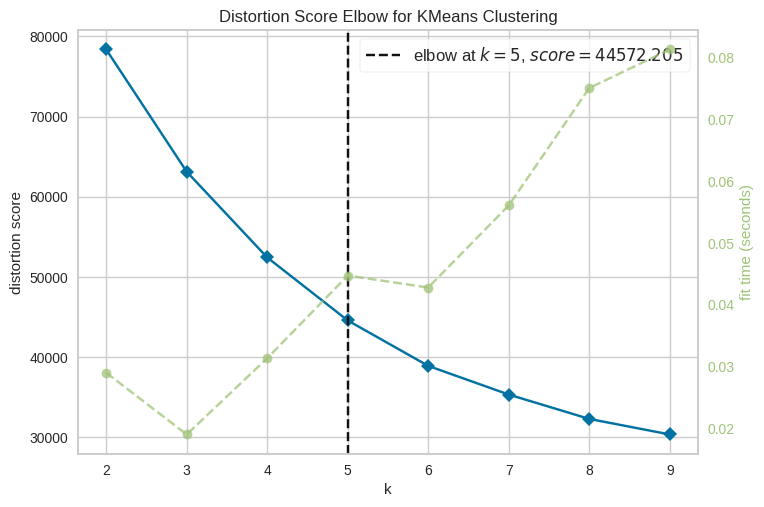

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

# Visualisasi Elbow
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(scaled_df_clustering)
visualizer.show()

**Insight**

Dapat dilihat dari visualisasi Elbow bahwa nilai `k` optimal yakni 5

Dilakukan KMeans untuk membagi data ke dalam 4 cluster.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df_clustering)

In [ ]:
score = silhouette_score(scaled_df_clustering, cluster_labels)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.280


**Insight**

Diperoleh nilai silhoutte score dari 4 cluster yakni 0.280

#### Kmeans + PCA

Berdasarkan hasil percobaan yang dilakukan sebelumnya, diketahui bahwa penerapan metode KMeans pada dataset dengan jumlah cluster optimal (baik dengan `k`=4 maupun `k`=5) menghasilkan nilai silhouette score yang tergolong rendah.

Untuk mengatasi hal tersebut maka dilakukan penggunaan PCA pada dataset `scaled_df_clsutering`. Proses ini dilakukan untuk mereduksi dimensi data agar struktur cluster menjadi lebih jelas, sehingga dapat meningkatkan nilai silhouette score. Dengan menyederhanakan fitur berdimensi tinggi menjadi dua atau tiga komponen utama, PCA membantu KMeans membentuk cluster yang lebih terpisah dan mudah diidentifikasi, baik secara visual maupun numerik.

Hasil dari penggunaan PCA pada dataset `scaled_df_clsutering` akan disimpan pada variabel `X_pca`










In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df_clustering)

Dilakukan kembali KMeans pada dataset yang sudah dilakukan PCA `X_pca`, tanpa menentukan jumlah cluster diawal agar dapat diketahui jumlah `k` optimal yang digunakan untuk clustering, pada tahapan awal ini akan menggunakan metode Elbow

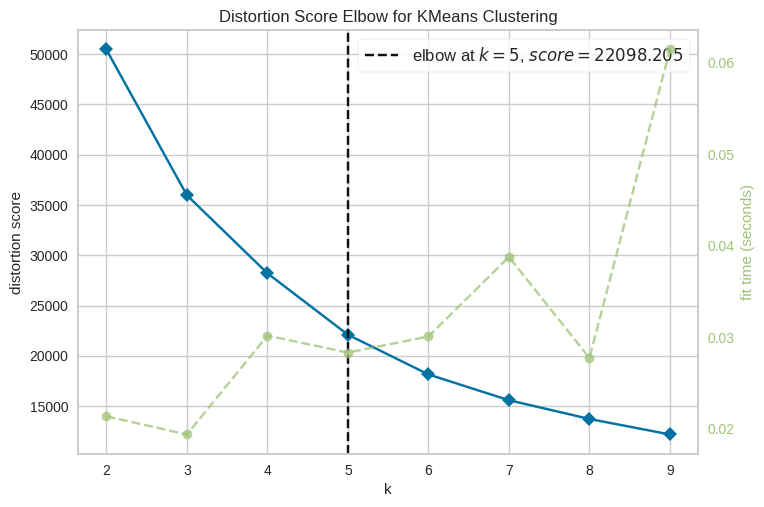

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_pca)
visualizer.show()

**Insight**

Dapat dilihat dari visualisasi Elbow bahwa nilai `k` optimal yakni 5. Namun dapat dilihat nilai silhoutte score dari nilai `k`= 4 tinggi, maka perlu dianalisis lebih lanjut

## Evaluasi Model

Setelah melakukan modeling, tahapan selanjutnya adalah melakukaan evaluasi model clustering.

Dilakukan clustering kembali pada dataset hasil PCA `X_pca` dengan menggunakan KMeans dengan nilai `k = 3, 4`, dan `5` untuk melihat perbandingan  nilai dari silhoutte score dari ketiga nilai `k`

Kemudian menghasilkan label cluster dalam `cluster_labels_PCA_4` (juga tersimpan dalam `kmeans_4.labels_`).



In [ ]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, max_iter=1000)
kmeans_4 = KMeans(n_clusters=4, random_state=42, max_iter=1000)
kmeans_5 = KMeans(n_clusters=5, random_state=42, max_iter=1000)

cluster_labels_PCA_3 = kmeans_3.fit_predict(X_pca)
cluster_labels_PCA_4 = kmeans_4.fit_predict(X_pca)
cluster_labels_PCA_5 = kmeans_5.fit_predict(X_pca)

Untuk menilai seberapa baik data terbagi dalam cluster, dengan menggunakan nilai silhoutte score yakni jika nilai silhoutte score mendekati 1 menunjukkan pemisahan cluster yang baik, sedangkan jika mendekati -1 menandakan data kurang cocok di cluster tersebut.

In [ ]:
score = silhouette_score(X_pca, cluster_labels_PCA_5)
print(f'Silhouette Score 5 Cluster: {score:.3f}')

score = silhouette_score(X_pca, cluster_labels_PCA_4)
print(f'Silhouette Score 4 Cluster: {score:.3f}')

score = silhouette_score(X_pca, cluster_labels_PCA_3)
print(f'Silhouette Score 3 Cluster: {score:.3f}')

Silhouette Score 5 Cluster: 0.424
Silhouette Score 4 Cluster: 0.566
Silhouette Score 3 Cluster: 0.554


**Insight**

Berdasarkan 3 perbandingan nilai silhouette score, diperoleh nilai silhoutte score tertinggi pada `k` = 4. Oleh karena itu, proses clustering akan dilanjutkan dengan menggunakan `k` = 4

## Menambahkan Label

Selanjutnya menambahkan hasil cluster (label) sebelumnya ke dalam dua subset dataset utama yakni `df_selected_input_user` dan `df_selected_clustering`

In [ ]:
df_selected_input_user['Target'] = kmeans_4.labels_
df_selected_clustering['Target'] = kmeans_4.labels_

## Visualisasi Clustering

Setelah model clustering dilatih dengan jumlah cluster optimal yang ditentukan, langkah selanjutnya adalah menampilkan hasil clustering (label) melalui visualisasi.
Data divisualisasikan dalam dua dimensi utama (komponen PCA pertama dan kedua) untuk memudahkan interpretasi pola cluster.


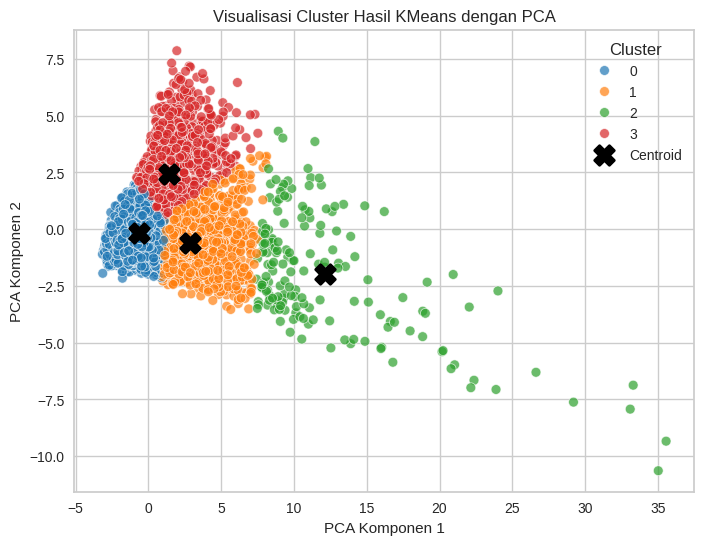

In [ ]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=kmeans_4.labels_,
    palette='tab10',
    s=50,
    alpha=0.7,
    legend='full'
)

# Hitung centroid dalam ruang PCA
centroids_pca = kmeans_4.cluster_centers_

# Plot centroid
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=200,  # Ukuran lebih besar
    c='black',  # Warna hitam untuk kontras
    linewidths=2,
    label='Centroid'
)

plt.title("Visualisasi Cluster Hasil KMeans dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

**Insight**

Berdasarkan hasil visualisasi clustering dengan KMeans + PCA, terlihat bahwa data terbagi menjadi 4 cluster yang terpisah dengan distribusi yang jelas.

- Cluster 2 memiliki persebaran paling luas, menunjukkan kelompok dengan karakteristik yang lebih beragam dibandingkan cluster lainnya.
- Sementara cluster 0, 1, dan 3 membentuk area yang lebih padat dan terpusat di sisi kiri grafik.

Hal ini menunjukkan bahwa metode clustering berhasil menangkap segmentasi data dengan baik setelah direduksi menggunakan PCA.

## Penjelasan Hasil Clustering

Hasil clustering pada dataset untuk input Pengguna

In [ ]:
df_selected_input_user.groupby('Target').mean()

,Pendapatan Bulanan,Total Pengeluaran,Tabungan,Cicilan Per Bulan,Dana Darurat,Total Aset,Total Utang
Target,,,,,,,
0,5.001393e+06,4.127099e+06,750014.266848,869315.480668,448125.955512,7.967469e+06,2.779833e+07
1,3.139808e+06,2.803065e+06,461024.634176,340736.664405,279183.809377,1.013819e+07,4.358138e+06
2,1.397689e+06,1.670004e+06,212669.922619,132974.083333,132492.535714,1.057143e+07,1.303516e+06
3,1.641449e+06,2.186101e+06,248290.633240,294795.361851,139005.462833,7.977560e+06,9.517028e+06


Hasil clustering pada dataset untuk modeling

In [ ]:
df_selected_clustering.groupby('Target').mean()

,ExpenseToIncomeRatio,SavingToIncomeRatio,DebtToIncomeRatio,EmergencyFundRatio,AssetToDebtRatio,DebtToAssetRatio
Target,,,,,,
0,0.839974,0.150506,0.177545,0.108746,0.424764,4.297545
1,0.953855,0.146793,0.118634,0.096969,2.636364,0.433924
2,1.277140,0.152622,0.102855,0.079666,9.015372,0.124951
3,1.405594,0.151058,0.185529,0.063473,1.134573,1.380765


**Insight**

**Cluster 0:**
1. ExpenseToIncomeRatio = 0.84 -> Pengeluaran tidak melebihi pendapatan, menunjukkan kondisi cashflow cukup sehat

2. SavingToIncomeRatio = 0.15 → Menyisihkan 15% untuk tabungan dari pendapatan, mendekati standar ideal (≥20%)

3. DebtToIncomeRatio = 0.18 → Utang sekitar 18% dari pendapatan, masih dalam batas aman (maksimal 30%).

4. EmergencyFundRatio = 0.11 → Dana darurat hanya setara 11% dari pengeluaran, masih jauh dari ideal (sekitar 3x pengeluaran bulanan).

5. AssetToDebtRatio = 0.42 → Total aset lebih rendah dibanding utang

6. DebtToAssetRatio = 4.30 →  Utang lebih besar daripada aset, sangat berisiko dibandingkan cluster yang lain.


**Cluster 1:**
1. ExpenseToIncomeRatio = 0.95 → Hampir seluruh pendapatan dihabiskan, menunjukkan kondisi cashflow yang tidak sehat

2. SavingToIncomeRatio = 0.15 → Sama seperti cluster 0, menyisihkan 15% untuk tabungan dari pendapatan, mendekati standar ideal (≥20%)

3. DebtToIncomeRatio = 0.12 → Utang sekitar 12% dari pendapatan, masih dalam batas aman.

4. EmergencyFundRatio = 0.10 → Dana darurat hanya setara 10% dari pengeluaran, masih jauh dari ideal.

5. AssetToDebtRatio = 2.64 → Memiliki aset yang cukup untuk menutupi utang, lebih aman secara likuiditas.

6. DebtToAssetRatio = 0.43 → Jumlah utang masih sebanding dengan total aset yang dimiliki

**Cluster 2:**

1. ExpenseToIncomeRatio = 1.28 → Pengeluaran melebihi pendapatan, menunjukkan kondisi cashflow yang berbahaya

2. SavingToIncomeRatio = 0.15 → Sama seperti cluster 0 dan 1 berhasil menyisihkan 15% untuk tabungan dari pendapatan, mendekati standar ideal (≥20%)

3. DebtToIncomeRatio = 0.10 → Utang sangat kecil

4. EmergencyFundRatio = 0.08 → Dana darurat hanya setara 8% dari pengeluaran, masih jauh dari ideal.

5. AssetToDebtRatio = 9.02 → Total aset sangat tinggi dibandingkan dengan utang dan diantara ckuster yang lain

6. DebtToAssetRatio = 0.12 → Jumlah utang sangat kecil terhadap aset, kondisi finansial sangat sehat meskipun defisit.


**Cluster 3:**
1. ExpenseToIncomeRatio = 1.41 → Pengeluaran melebihi pendapatan daripada cluster lain, menunjukkan kondisi cashflow yang berbahaya

2. SavingToIncomeRatio = 0.15 → Sama seperti cluster ainnya, berhasil menyisihkan 15% untuk tabungan dari pendapatan, mendekati standar ideal (≥20%)

3. DebtToIncomeRatio = 0.19 → Utang sekitar 19% dari pendapatan, masih dalam batas aman

4. EmergencyFundRatio = 0.06 → Dana darurat sangat kecil daripada cluster lain, hanya setara 8% dari pengeluaran, masih jauh dari ideal.

5. AssetToDebtRatio = 1.13 → Aset hanya sedikit lebih besar dari utang

6. DebtToAssetRatio = 1.38 → Utang lebih besar daripada aset, sangat berisiko.

# **4. Mengekspor Hasil Clustering**

In [ ]:
df_selected_input_user.to_csv('Dataset_final_input_user.csv')
df_selected_clustering.to_csv('Dataset_final_rasio.csv')